<h1><center>The Machine Learning Model<center><h1>

# My Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from PIL import Image                     
from IPython.display import display

# Libraries for ML model

In [2]:
# Libraries for training model

from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics

# Libraries for Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# My Figure Size

In [3]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (8,6)  

# Remove Warning

In [4]:
import warnings
warnings.simplefilter("ignore")

# My Dataset

In [5]:
df = pd.read_csv('Datasets/My_cleaned_dataset.csv',index_col='Unnamed: 0')
df.head()

,age,sex,chest pain,resting blood pressure,cholesterol in mg/dl,fasting blood sugar,resting ECG results,maximum heart rate achieved,exercise induced angina,oldpeak,slope,number of major vessels,thalassemia,angiographic disease status
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### I will change name of `"angiographic disease status"` feature to `"Target"` as it is the target value

In [6]:
df.rename({'angiographic disease status':'Target'},axis='columns',inplace=True)
df.head()

,age,sex,chest pain,resting blood pressure,cholesterol in mg/dl,fasting blood sugar,resting ECG results,maximum heart rate achieved,exercise induced angina,oldpeak,slope,number of major vessels,thalassemia,Target
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Now I want to divide my data into 3 sets
> - Training Set :  (70 %) <br><br>
> - Cross Validation Set :  (15 %) <br><br>
> - Testing Set :  (15 %)

## I will use 6 algorithms on my data to see which algorithm will give higher accuracy to make it as my model algotithm

## My Algorithms :
> - Logistic Regression <br><br>
> - Decision Tree <br><br>
> - Random Forest <br><br>
> - Support Vector Machine <br><br>
> - KNN <br><br>
> - Naive Bayes

In [7]:
df.shape

(303, 14)

In [8]:
print(Fore.LIGHTBLUE_EX + 'Number of rows which will be used for Training and validation : ',int(0.9*303))
print(Fore.BLUE + 'Number of rows which will be used for Testing : ',int(303-int(0.9*303)))

Number of rows which will be used for Training and validation :  272
Number of rows which will be used for Testing :  31


In [9]:
data_for_trainig_and_validation = df.loc[0:int(0.9*303)]
data_for_testing = df.loc[int(0.9*303)+1::]

x_result = data_for_testing.drop(['Target'],axis=1)
y_result = data_for_testing['Target']

## Model Training

In [10]:
X = data_for_trainig_and_validation.drop(['Target'],axis=1)
Y = data_for_trainig_and_validation['Target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=int((10*100)/90)/100, random_state=42 , stratify=Y)

## Now I will create a model pipeline 

In [11]:
pipeline = []

pipeline.append(LogisticRegression(solver='liblinear'))
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())
pipeline.append(RandomForestClassifier())
pipeline.append(GaussianNB())

# Here I will Make a loop to show model accuracies 

In [12]:
my_models = ['Logistic Regression','Support Vector Machine','KNN','Decision Tree','Random Forest','Naive Bayes']

validation_accuracy_list = []
testing_accuracy_list = []


for model in pipeline:
    model.fit(X_train,y_train)
    y_out_cv = model.predict(X_test)
    validation_accuracy_list.append(metrics.accuracy_score(y_test,y_out_cv))

for model in pipeline:
    y_out_testing = model.predict(x_result)
    testing_accuracy_list.append(metrics.accuracy_score(y_result,y_out_testing))
    
    
my_models = pd.DataFrame({
    'Model name' : my_models,
    'Cross Validation accuracy' : validation_accuracy_list,
    'Testing accuracy' : testing_accuracy_list
})


my_models

,Model name,Cross Validation accuracy,Testing accuracy
0,Logistic Regression,0.709677,0.800000
1,Support Vector Machine,0.709677,0.566667
2,KNN,0.709677,0.700000
3,Decision Tree,0.677419,0.666667
4,Random Forest,0.741935,0.766667
5,Naive Bayes,0.709677,0.833333


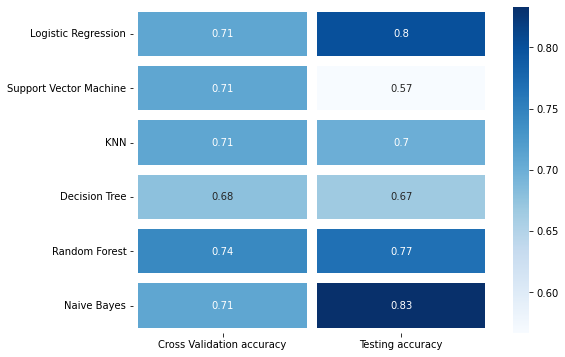

In [13]:
sns.heatmap(my_models[['Cross Validation accuracy','Testing accuracy']],cmap='Blues',
            annot=True,linewidths=10,yticklabels=my_models['Model name'])
plt.show()

# Now I noticed that best model to train this data on is Naive Bayes

# <br><br> The END